# LangChain Fundamentals 📚📚

In [11]:
pip install geopandas


DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [51]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame with two points
data = {'ID': [1, 2],
        'Latitude': [38.0850095210875, 38.11740218562655 ],
        'Longitude': [-0.9483816545176874, -0.9528362878196897]}

geometry = [Point(lon, lat) for lon, lat in zip(data['Longitude'], data['Latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")  # Set CRS to EPSG:4326 (WGS 84)

# Print the GeoDataFrame
print("GeoDataFrame:")
print(gdf)

# Reproject to a CRS that uses meters (e.g., EPSG:3395, World Mercator)
gdf = gdf.to_crs("EPSG:3395")

# Calculate distance between the two points using haversine
distance = gdf.distance(gdf.shift())  # Shift the GeoDataFrame and calculate distance
distance_km = distance.to_numpy()[1] / 1000  # Convert distance to kilometers

print("\nDistance between the two points:", distance_km, "kilometers")


GeoDataFrame:
   ID   Latitude  Longitude                   geometry
0   1  38.085010  -0.948382  POINT (-0.94838 38.08501)
1   2  38.117402  -0.952836  POINT (-0.95284 38.11740)

Distance between the two points: 4.590148470149924 kilometers


/var/folders/4d/jjctyfyd3pz2zhdsjxq8xjsh0000gn/T/ipykernel_18958/537653055.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_circles['geometry'] = gdf_circles.buffer(radius)


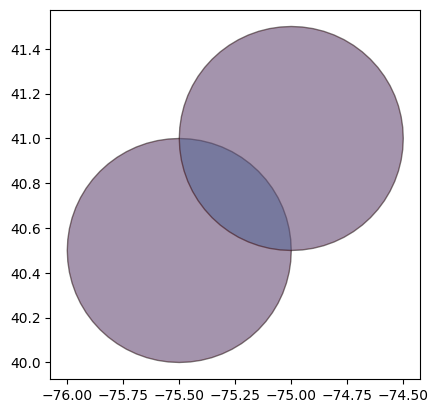

In [32]:
import geopandas as gpd
from shapely.geometry import Point

# Step 1: Create a GeoDataFrame with your points
data = {'Name': ['Point1', 'Point2'],
        'geometry': [Point(-75.5, 40.5), Point(-75, 41)]}


gdf_points = gpd.GeoDataFrame(data, geometry='geometry', crs='EPSG:4326')

# Step 2: Buffer the points to create circles with a specified radius
radius = 0.5  # Assuming a radius of 0.5 degrees (adjust as needed)
gdf_circles = gdf_points.copy()
gdf_circles['geometry'] = gdf_circles.buffer(radius)

# Step 3: Merge or intersect the circles to find the catchment area
catchment = gdf_circles.unary_union

# Optional: Plot the result
ax = gdf_circles.plot(alpha=0.5, edgecolor='k')
gpd.GeoSeries(catchment).plot(ax=ax, color='red', alpha=0.2)

# Show the plot
import matplotlib.pyplot as plt
plt.show()



In [62]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import cascaded_union

# Step 1: Create a GeoDataFrame with your points
data = {
    'id': ['Point1', 'Point2', 'Point3'],
    'geometry': [
        Point(38.0850095210875, -0.9483816545176874),
        Point(38.11740218562655, -0.9528362878196897),
        Point(38.11740218562655, -0.9428362878196897)],
}

gdf = gpd.GeoDataFrame(data, geometry='geometry', crs='epsg:4326')

# Reproject to a CRS that uses meters (e.g., EPSG:3395, World Mercator)
gdf = gdf.to_crs("EPSG:3395")


# Buffer around each point
buffer_radius = 3000  # in meters
gdf['buffer'] = gdf['geometry'].buffer(buffer_radius)

# Merge all buffers into a single geometry (union of all buffers)
union_buffer = cascaded_union(gdf['buffer'])

# Function to count points within the union_buffer
def count_points_within_buffer(point):
    intersection = point.buffer(buffer_radius).intersection(union_buffer)
    return sum(gdf['geometry'].within(intersection))-1

# Apply the function to each point
gdf['interference_count'] = gdf['geometry'].apply(count_points_within_buffer)

# Resulting GeoDataFrame
print(gdf[['id', 'interference_count']])


       id  interference_count
0  Point1                   2
1  Point2                   2
2  Point3                   2


/var/folders/4d/jjctyfyd3pz2zhdsjxq8xjsh0000gn/T/ipykernel_18958/2665786346.py:25: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  union_buffer = cascaded_union(gdf['buffer'])
